Chapter 2:

In [21]:
import pandas as pd

df = pd.read_csv('Dataset/train.csv')

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Nueva celda para guardar comentarios como corpus estructurado

import os

# Crear un directorio para almacenar el corpus
corpus_dir = 'corpus_by_label'
os.makedirs(corpus_dir, exist_ok=True)

# Guardar los comentarios en archivos separados por etiqueta
for label in labels:  # labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    comments = df[df[label] == 1]['comment_text'].dropna()
    file_path = os.path.join(corpus_dir, f"{label}.txt")
    
    # Guardar todos los comentarios de la etiqueta en un solo archivo
    with open(file_path, 'w', encoding='utf-8') as f:
        for comment in comments:
            f.write(comment.replace('\n', ' ') + '\n')  # Cada comentario es una línea

print(f"Corpus succesfuly loaded in: {corpus_dir}")

Corpus succesfuly loaded in: corpus_by_label


In [22]:
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('punkt')

# Load corpus
corpus = PlaintextCorpusReader(corpus_dir, '.*\.txt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
print(f"List of files in corpus: {corpus.fileids()}")

List of files in corpus: ['identity_hate.txt', 'insult.txt', 'obscene.txt', 'severe_toxic.txt', 'threat.txt', 'toxic.txt']


In [24]:
for fileid in corpus.fileids():
    file = corpus.words(fileid)
    print(f"File: {fileid} - Number of words: {len(file)}")

File: identity_hate.txt - Number of words: 88394
File: insult.txt - Number of words: 469413
File: obscene.txt - Number of words: 519918
File: severe_toxic.txt - Number of words: 149959
File: threat.txt - Number of words: 32656
File: toxic.txt - Number of words: 964034


In [25]:
for fileid in corpus.fileids():
    num_chars = len(corpus.raw(fileid)) 
    num_words = len(corpus.words(fileid))
    num_sents = len(corpus.sents(fileid))
    num_vocab = len(set(w.lower() for w in corpus.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 19 11 identity_hate.txt
5 16 22 insult.txt
5 16 23 obscene.txt
5 14 23 severe_toxic.txt
5 12 10 threat.txt
5 17 28 toxic.txt


In [54]:
toxic_sentences = corpus.sents('toxic.txt')
toxic_sentences
print(toxic_sentences[0])

['COCKSUCKER', 'BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', 'MY', 'WORK', 'Hey', '...', 'what', 'is', 'it', '..', '@', '|', 'talk', '.']


In [55]:
longest_len = max(len(s) for s in toxic_sentences)
print([s for s in toxic_sentences if len(s) == longest_len])

[['I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.', 'I', 'hate', 'you', '.'

In [28]:
for fileid in corpus.fileids():
    print(fileid, corpus.raw(fileid)[:65], '...')

identity_hate.txt You are gay or antisemmitian?   Archangel WHite Tiger  Meow! Gree ...
insult.txt COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
You are gay or anti ...
obscene.txt COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
You are gay or anti ...
severe_toxic.txt COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
Stupid peace of shi ...
 ...at.txt Hi! I am back again! Last warning! Stop undoing my edits or die!
toxic.txt COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
Hey... what is it.. ...


In [29]:
'''
NO SE COMO PONER ESTO
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]
['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',',
'I', 'can', 'look', 'in', 'a', 'mirror', '.']
'''

'\nNO SE COMO PONER ESTO\nfrom nltk.corpus import nps_chat\nchatroom = nps_chat.posts(\'10-19-20s_706posts.xml\')\nchatroom[123]\n[\'i\', \'do\', "n\'t", \'want\', \'hot\', \'pics\', \'of\', \'a\', \'female\', \',\',\n\'I\', \'can\', \'look\', \'in\', \'a\', \'mirror\', \'.\']\n'

In [30]:
toxic_text = corpus.words('toxic.txt')
fdist = nltk.FreqDist(w.lower() for w in toxic_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 3008 could: 380 may: 303 might: 198 must: 456 will: 2829 

In [35]:
print(corpus.words('toxic.txt')[:14])
print(corpus.words(['insult.txt', 'obscene.txt']))

['COCKSUCKER', 'BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', 'MY', 'WORK', 'Hey', '...', 'what', 'is', 'it', '..']
['COCKSUCKER', 'BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', ...]


<Axes: xlabel='Samples', ylabel='Counts'>

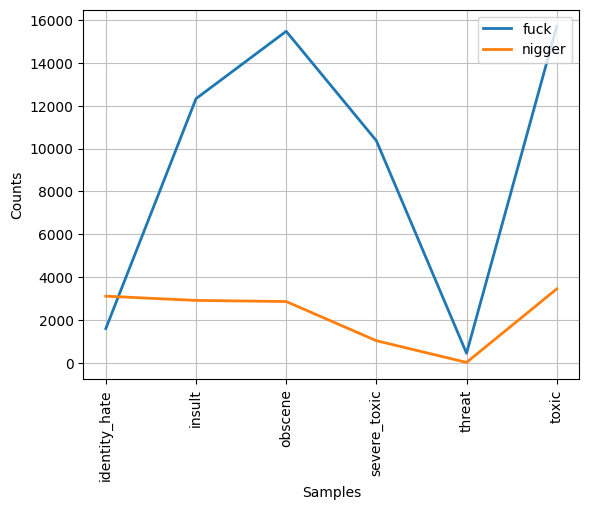

In [43]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:-4])
    for fileid in corpus.fileids()
    for w in corpus.words(fileid)
    for target in ['nigger', 'fuck']
    if w.lower().startswith(target))
cfd.plot()

In [46]:
raw = corpus.raw('obscene.txt')
print(raw[1:20])
words = corpus.words('obscene.txt')
print(words[1:20])
sents = corpus.sents('obscene.txt')
print(sents[1:20])

OCKSUCKER BEFORE YO
['BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', 'MY', 'WORK', 'You', 'are', 'gay', 'or', 'antisemmitian', '?', 'Archangel', 'WHite', 'Tiger', 'Meow', '!', 'Greetingshhh']
[['Archangel', 'WHite', 'Tiger', 'Meow', '!'], ['Greetingshhh', '!'], ['Uh', ',', 'there', 'are', 'two', 'ways', ',', 'why', 'you', 'do', 'erased', 'my', 'comment', 'about', 'WW2', ',', 'that', 'holocaust', 'was', 'brutally', 'slaying', 'of', 'Jews', 'and', 'not', 'gays', '/', 'Gypsys', '/', 'Slavs', '/', 'anyone', '...', '1', '-', 'If', 'you', 'are', 'anti', '-', 'semitian', ',', 'than', 'shave', 'your', 'head', 'bald', 'and', 'go', 'to', 'the', 'skinhead', 'meetings', '!'], ['2', '-', 'If', 'you', 'doubt', 'words', 'of', 'the', 'Bible', ',', 'that', 'homosexuality', 'is', 'a', 'deadly', 'sin', ',', 'make', 'a', 'pentagram', 'tatoo', 'on', 'your', 'forehead', 'go', 'to', 'the', 'satanistic', 'masses', 'with', 'your', 'gay', 'pals', '!'], ['3', '-', 'First', 'and', 'last', 'warning', ',', 'you', 'fucking

In [ ]:
cdf = nltk.ConditionalFreqDist(
    (target, fileid[:-4])
    for fileid in corpus.fileids()
    for w in corpus.words(fileid)
    for target in ['nigger', 'fuck']
    if w.lower().startswith(target))

In [49]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
    'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [51]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = corpus.words('toxic.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [52]:
cfd['living']

FreqDist({'up': 20, 'in': 13, 'hell': 5, '.': 4, 'room': 3, 'here': 2, 'person': 2, 'things': 2, 'off': 2, 'there': 2, ...})

In [53]:
generate_model(cfd, 'living')

living up the fuck yourself ! I ' t you are a dickhead your a 